<a href="https://colab.research.google.com/github/Madhav7851/python_workshop/blob/main/heartdeseasepredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Heart Disease Prediction with Machine Learning***


In this Data Science Project I will be applying Machine Learning techniques to classify whether a person is suffering from Heart Disease or not.


Libraries Used :-    

1.   numpy- Helps in Formaton of multi-dimensional arrays and matrices
2.   pandas- Helps in  data manipulation and analysis
3.   Matplotlib- Matplotlib is a plotting library for the Python programming  language and its numerical mathematics extension NumPy.
4.   Seaborn- Python data visualization library
5.   Sikitlearn-machine learning library for the Python programming





Dataset can be downloaded through the link given below

[Heart.csv](https://thecleverprogrammer.com/wp-content/uploads/2020/05/heart.csv)

link below specifies the source of our dataset

[Kaggle](https://www.kaggle.com/datasets/soulpirooooooo/heart-disease-prediction)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df = pd.read_csv('heart (3).csv')
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [ ]:
print(df.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

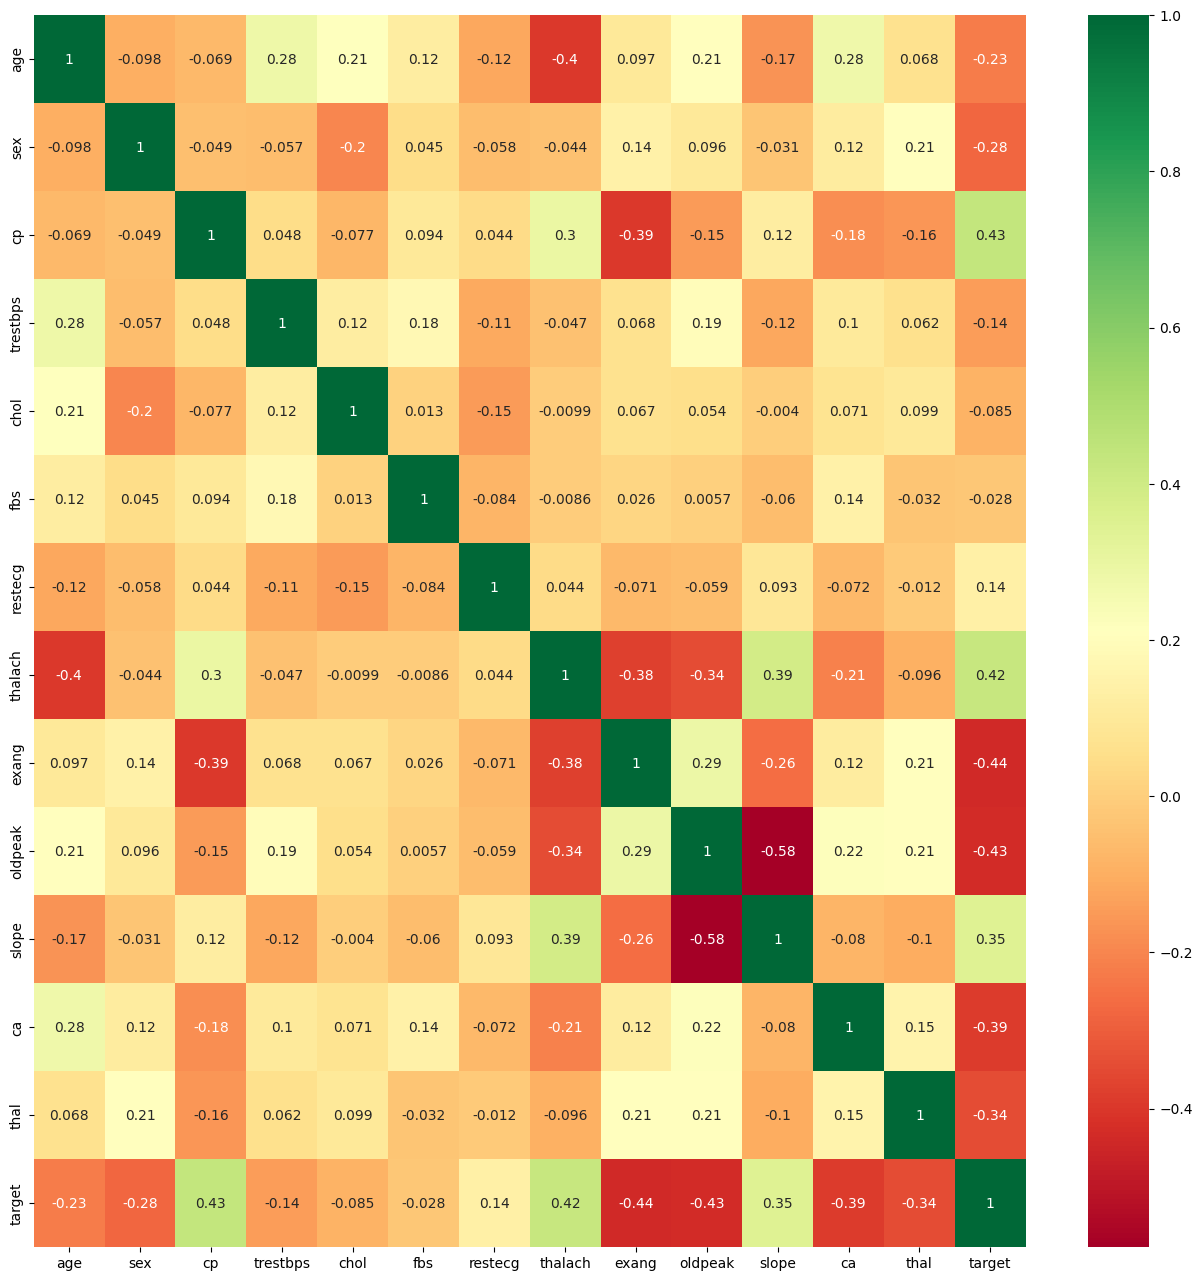

In [ ]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(16,16))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show()

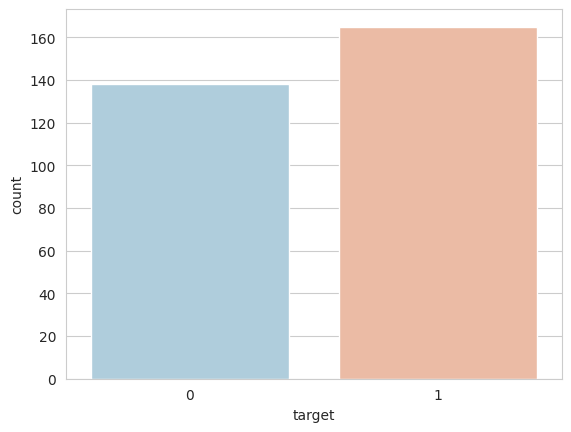

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')
plt.show()

In [ ]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp',
                                        'fbs','restecg',
                                        'exang', 'slope',
                                        'ca', 'thal'])
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])
dataset.head(25)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,0.763956,-0.256334,0.015443,1.087338,1,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
1,37,-0.092738,0.072199,1.633471,2.122573,1,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
2,41,-0.092738,-0.816773,0.977514,0.310912,1,True,False,False,True,...,True,True,False,False,False,False,False,False,True,False
3,56,-0.663867,-0.198357,1.239897,-0.206705,1,False,True,False,True,...,True,True,False,False,False,False,False,False,True,False
4,57,-0.663867,2.082050,0.583939,-0.379244,1,True,False,True,False,...,True,True,False,False,False,False,False,False,True,False
5,57,0.478391,-1.048678,-0.072018,-0.551783,1,False,True,True,False,...,False,True,False,False,False,False,False,True,False,False
6,56,0.478391,0.922521,0.146634,0.224643,1,True,False,False,True,...,False,True,False,False,False,False,False,False,True,False
7,44,-0.663867,0.323431,1.021244,-0.896862,1,False,True,False,True,...,True,True,False,False,False,False,False,False,False,True
8,52,2.306004,-0.913400,0.540209,-0.465514,1,False,True,False,False,...,True,True,False,False,False,False,False,False,False,True
9,57,1.049520,-1.512490,1.064975,0.483451,1,False,True,False,False,...,True,True,False,False,False,False,False,False,True,False


In [ ]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:

knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

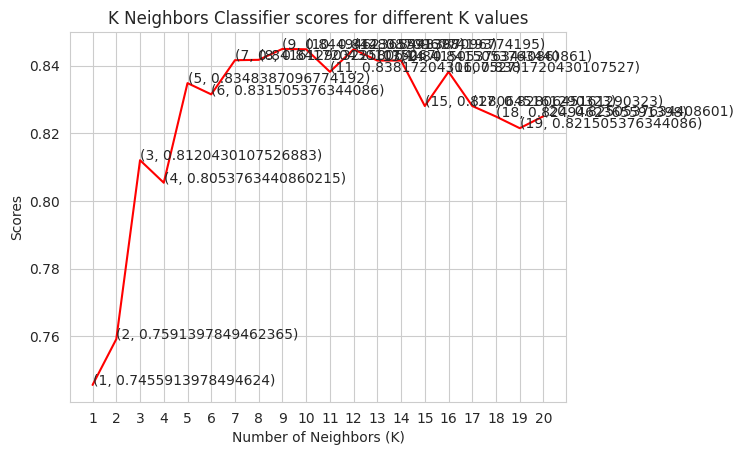

In [ ]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')
plt.show()

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X,y,cv=10)
score.mean()

0.8448387096774195

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
randomforest_classifier= RandomForestClassifier(n_estimators=10)
score=cross_val_score(randomforest_classifier,X,y,cv=10)
score.mean()

np.float64(0.831505376344086)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [ ]:
X_test.to_csv('testdata', sep=',', index=False, encoding='utf-8')
print(X_test)

          age  trestbps      chol   thalach   oldpeak  sex_0  sex_1   cp_0  \
151  1.834507 -1.120770 -1.879674 -1.077820  0.483451   True  False   True   
21  -1.143291 -0.092738 -0.256334  1.283627 -0.551783  False   True  False   
266  0.069886  2.762907  1.560262 -1.427664  2.036303   True  False   True   
15  -0.481558 -0.663867 -0.526890  0.365287  0.483451   True  False  False   
8   -0.260980  2.306004 -0.913400  0.540209 -0.465514  False   True  False   
..        ...       ...       ...       ...       ...    ...    ...    ...   
196 -0.922713  1.049520 -0.294985 -0.115749  2.208842  False   True  False   
224 -0.040403 -1.234996 -0.140381 -1.034089  1.518686  False   True   True   
186  0.621330 -0.092738  0.130176 -0.246940  0.310912  False   True   True   
268 -0.040403 -0.549641  0.767917 -1.471394  1.863764  False   True   True   
145  1.724218  1.392198 -0.024428 -0.290671 -0.896862  False   True  False   

      cp_1   cp_2  ...  slope_2   ca_0   ca_1   ca_2   ca_3   c

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
rf.predict([[-0.26098049056771283,-0.6638668207381725,1.521610664184709,0.9775138938257651,-0.7243226048033724,False,True,False,True,False,False,True,False,False,True,False,True,False,False,False,True,True,False,False,False,False,False,False,True,False]])

Accuracy: 0.8032786885245902


array([1])

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.8529411764705882
Recall: 0.8055555555555556
F1 Score: 0.8285714285714286
